# Reinforcement Learning
## From chapter 6 - Mastering Machine Learning with Python in Six Steps

### Example code for q-learning

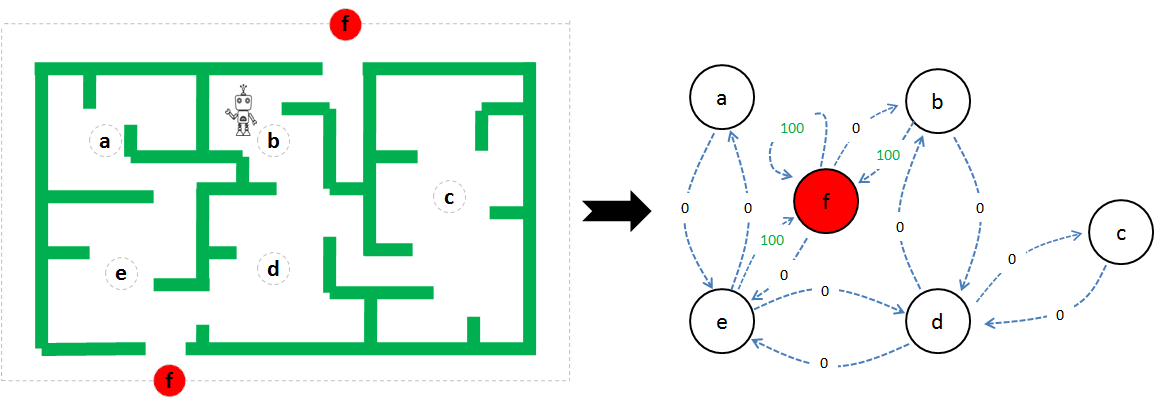

In [1]:
from IPython.display import Image
Image(filename='Maze_Markov_Decision_process.png')

In [2]:
# Importing the necessary packages
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [3]:
# Defining the reward/link connection graph
R = np.matrix([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]]).astype("float32")

Q = np.zeros_like(R)

The -1’s in the table means there isn’t a link between nodes. For example, State ‘a’ cannot go to State ‘b’.

In [4]:
# Learning parameter
gamma = 0.8

In [5]:
# Initializing random_state
initial_state = randint(0,4)

In [6]:
# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [7]:
# This function chooses at random which action to be performed within the range of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [8]:
# This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value  

In [9]:
# Getting available actions in the current state
available_act = available_actions(initial_state)
available_act

array([3], dtype=int64)

In [10]:
# Sample next action to be performed
action = sample_next_action(available_act)
action

3

In [11]:
# Training over 100 iterations, re-iterate the process above).
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)

In [12]:
# Normalizing the "trained" Q matrix
print ("Trained Q matrix: \n", Q/np.max(Q)*100)

Trained Q matrix: 
 [[  0.           0.           0.           0.          79.99999523
    0.        ]
 [  0.           0.           0.          53.48505974   0.
  100.        ]
 [  0.           0.           0.          53.48505974   0.
    0.        ]
 [  0.          79.99999523   0.           0.          63.03342581
    0.        ]
 [ 50.42673945   0.           0.          53.48505974   0.
  100.        ]
 [  0.          79.99999523   0.           0.          63.03342581
   83.57041478]]


In [13]:
# Testing
current_state = 2
steps = [current_state]

while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
        
    steps.append(next_step_index)
    current_state = next_step_index

In [14]:
# Printing selected sequence of steps
print ("Best sequence path: ", steps)

Best sequence path:  [2, 3, 1, 5]


## From chapter 15 - Artificial Intelligence with Python

In [15]:
# Importing the necessary packages
import argparse
import gym

In [16]:
# Creating the environment and reset it
env_name = "CartPole-v1"
env_name = "MountainCar-v0"
env_name = "MountainCarContinuous-v0"
env_name = "Acrobot-v1"
env_name = "Pendulum-v0"
env_name = "FrozenLake-v0"
env_name = "Taxi-v3"

env = gym.make(env_name)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
type(env.action_space)

env.reset()

# Iterating 1000 times
for _ in range(1000):
    # Rendering the environment
    env.render()

    # Taking a random action
    env.step(env.action_space.sample())

Observation space: Discrete(500)
Action space: Discrete(6)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: |_: :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+--------

In [17]:
print("Pick one of these enviroments:")

input_env = input("choices=['cartpole', 'mountaincar', 'pendulum', 'taxi', 'lake']\n")

# Creating a mapping from input argument string to the names of the environments
name_map = {'cartpole': 'CartPole-v0', 
            'mountaincar': 'MountainCar-v0',
            'pendulum': 'Pendulum-v0',
            'taxi': 'Taxi-v1',
            'lake': 'FrozenLake-v0'}

# Creating the environment 
env = gym.make(name_map[input_env])

# Iterating 
for _ in range(20):
    observation = env.reset()

    # Iterate 100 times
    for i in range(100):
        # Rendering the environment
        env.render()

        # Printing the current observation
        print(observation)

        # Taking action 
        action = env.action_space.sample()

        # Extracting the observation, reward, status and other info based on the action taken
        observation, reward, done, info = env.step(action)
            
        # Checking if it's done
        if done:
            print('Episode finished after {} timesteps'.format(i+1))
            break

Pick one of these enviroments:


choices=['cartpole', 'mountaincar', 'pendulum', 'taxi', 'lake']
 cartpole


[ 0.02178026 -0.02737312 -0.01269154 -0.04996081]
[ 0.0212328  -0.22231081 -0.01369076  0.23869096]
[ 0.01678658 -0.02699598 -0.00891694 -0.05827879]
[ 0.01624666  0.16825269 -0.01008252 -0.35376168]
[ 0.01961172 -0.02672446 -0.01715775 -0.06427504]
[ 0.01907723  0.16863923 -0.01844325 -0.36232158]
[ 0.02245001 -0.02621579 -0.02568968 -0.07551076]
[ 0.0219257  -0.22096021 -0.0271999   0.20895755]
[ 0.01750649 -0.02546011 -0.02302075 -0.09217992]
[ 0.01699729  0.16998411 -0.02486434 -0.39203607]
[ 0.02039697  0.36544994 -0.03270507 -0.69245354]
[ 0.02770597  0.56101    -0.04655414 -0.99525034]
[ 0.03892617  0.36654058 -0.06645914 -0.71754424]
[ 0.04625698  0.17239824 -0.08081003 -0.44649821]
[ 0.04970495  0.36856486 -0.08973999 -0.7635202 ]
[ 0.05707625  0.56480062 -0.1050104  -1.08303754]
[ 0.06837226  0.76113974 -0.12667115 -1.40674025]
[ 0.08359505  0.95758565 -0.15480595 -1.73619003]
[ 0.10274677  0.76453093 -0.18952975 -1.49540231]
Episode finished after 19 timesteps
[ 0.00252101  